# Dataset

In [1]:
#To ignore warnings.
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Load the dataset.
import pandas as pd
df=pd.read_csv("Dataset/spam.csv", encoding='latin-1')
#Remove unwanted columns.
df = df.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
#Name the columns.
df.columns = ["label", "text"]
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data preprocessing

In [4]:
import nltk,string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
#Getting the english stopwords.
stopwords = nltk.corpus.stopwords.words('english')

In [6]:
#Function to clean the text.
def clean_text(text):
    #remove punctuation
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    #separate into tokens
    tokens = text.split()
    #remove stopwords
    text = [word for word in tokens if word not in stopwords]
    return text

#Function to handle categorical data
def label_encoder(label):
    if label=="spam":
        return 1
    else:
        return 0

In [7]:
#Apply the clean_text function 
df["cleaned_text"]=df["text"].apply(clean_text)

In [8]:
#Apply the lable encoder function
df["label"]=df["label"].apply(label_encoder)

In [9]:
df.head()

,label,text,cleaned_text
0,0,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t..."


# RNN

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#Split the data (train, test).
X_train, X_test, y_train, y_test = train_test_split(df["cleaned_text"],df['label'],test_size=0.2)

In [12]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [13]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train)

In [14]:
#Convert the text into sequences.
train_seq=tokenizer.texts_to_sequences(X_train)
test_seq=tokenizer.texts_to_sequences(X_test)

In [15]:
#Padded sequences.
train_seq_padded=pad_sequences(train_seq,50)
test_seq_padded=pad_sequences(test_seq,50)

# Lets build the model !

In [16]:
from keras.layers import Dense, Embedding,LSTM
from keras.models import Sequential
import numpy as np

In [17]:
#RNN model.
model = Sequential()
model.add(Embedding(len(tokenizer.index_word)+1, 32))
model.add(LSTM(32, dropout=0, recurrent_dropout=0))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          266880    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 276,289
Trainable params: 276,289
Non-trainable params: 0
_________________________________________________________________


In [18]:
#Compile the model.
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [19]:
model_val=model.fit(train_seq_padded,y_train,batch_size=32,epochs=10,validation_data=(test_seq_padded,y_test))

Epoch 1/10
140/140 [==============================] - 7s 31ms/step - loss: 0.4335 - accuracy: 0.8490 - val_loss: 0.0988 - val_accuracy: 0.9749
Epoch 2/10
140/140 [==============================] - 4s 25ms/step - loss: 0.0424 - accuracy: 0.9897 - val_loss: 0.0664 - val_accuracy: 0.9812
Epoch 3/10
140/140 [==============================] - 4s 25ms/step - loss: 0.0120 - accuracy: 0.9971 - val_loss: 0.0849 - val_accuracy: 0.9803
Epoch 4/10
140/140 [==============================] - 3s 25ms/step - loss: 0.0027 - accuracy: 0.9997 - val_loss: 0.0762 - val_accuracy: 0.9830
Epoch 5/10
140/140 [==============================] - 4s 25ms/step - loss: 0.0024 - accuracy: 0.9991 - val_loss: 0.1003 - val_accuracy: 0.9821
Epoch 6/10
140/140 [==============================] - 3s 25ms/step - loss: 0.0011 - accuracy: 0.9992 - val_loss: 0.1041 - val_accuracy: 0.9821
Epoch 7/10
140/140 [==============================] - 4s 25ms/step - loss: 2.0107e-04 - accuracy: 1.0000 - val_loss: 0.1062 - val_accuracy: 0.

# Evaluation

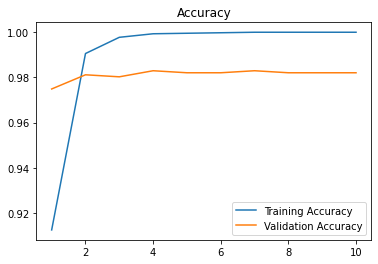

In [22]:
# Plot evaluation metrics across epochs.
import matplotlib.pyplot as plt
acc = model_val.history["accuracy"]
val_acc = model_val.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()